<a href="https://colab.research.google.com/github/nagabathula/cmpe257/blob/main/assignment2/CC_Data___Clutering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this colab, we have used credit card data is used to derive the customer segmentation. This data set is downloaded from Kaggle.**

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID** : Identification of Credit Card holder (Categorical)

**BALANCE** : Balance amount left in their account to make purchases (

**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment

**CASH_ADVANCE** : Cash in advance given by the user

**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX** : Numbe of purchase transactions made

**CREDIT_LIMIT** : Limit of Credit Card for user

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user

**PRCFULLPAYMENT** : Percent of full payment paid by user

**TENURE** : Tenure of credit card service for user










We have applied Kmeans, GMM and DBScan clustering techniques. We compared various techniques to compare each of the models.

Conclusion : KMeans clustering technique the best with highest schellotee score 0.23 when compared to DBSCA (negaytive), GMM (0.0480)

In [1]:

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


# **Customer Segmentation based on Credit Card Data**

In [2]:
import numpy as np
import pandas as pd

In [6]:
cc = pd.read_csv('/content/gdrive/MyDrive/257-sem2/Datasets/CC_GENERAL.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# General information about columns
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
cc.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
cc[cc.columns[cc.isna().any()]].isna().sum().to_frame().T
cc.sample(5)
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
cc.quantile([0.25,0.5,0.75,0.8,.85,.9,.95,1])


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0.25,128.281915,0.888889,39.6350,0.0000,0.0000,0.000000,0.083333,0.000000,0.000000,0.000000,0.0,1.0,1600.0,383.276166,169.123707,0.000000,12.0
0.50,873.385231,1.000000,361.2800,38.0000,89.0000,0.000000,0.500000,0.083333,0.166667,0.000000,0.0,7.0,3000.0,856.901546,312.343947,0.000000,12.0
0.75,2054.140036,1.000000,1110.1300,577.4050,468.6375,1113.821139,0.916667,0.300000,0.750000,0.222222,4.0,17.0,6500.0,1901.134317,825.485459,0.142857,12.0
0.80,2571.434263,1.000000,1422.4380,816.9920,603.2920,1574.933778,1.000000,0.416667,0.857143,0.250000,5.0,22.0,7000.0,2314.017654,1026.297507,0.250000,12.0
0.85,3183.333173,1.000000,1859.1160,1116.4075,823.0615,2194.722013,1.000000,0.529546,0.916667,0.333333,7.0,27.0,8000.0,2945.839128,1313.933300,0.424405,12.0
0.90,4338.563657,1.000000,2542.6240,1600.0990,1140.0700,3065.534560,1.000000,0.750000,1.000000,0.416667,10.0,37.0,9500.0,3923.906642,1780.651744,0.670000,12.0
0.95,5909.111808,1.000000,3998.6195,2671.0940,1750.0875,4647.169122,1.000000,1.000000,1.000000,0.583333,15.0,57.0,12000.0,6082.090595,2766.563310,1.000000,12.0
1.00,19043.138560,1.000000,49039.5700,40761.2500,22500.0000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.0,358.0,30000.0,50721.483360,76406.207520,1.000000,12.0


In [12]:
cc.rename(columns = {col:col.lower() for col in cc.columns.values},inplace=True)

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture as GMM
from sklearn.manifold import TSNE


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


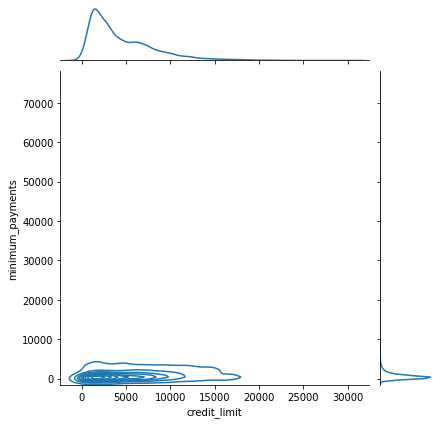

In [18]:
sns.jointplot(cc.credit_limit,cc.minimum_payments,kind = 'kde', dropna=True)

In [19]:
cc.fillna(cc.median(),inplace=True) #More outliers thus median in both cases


<ipython-input-19-28d24b7e1e0a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cc.fillna(cc.median(),inplace=True) #More outliers thus median in both cases


In [20]:
cust = cc.cust_id
cc.drop(columns = ['cust_id'],inplace=True)


In [21]:
cc.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
ss = StandardScaler()
X= normalize(ss.fit_transform(cc.copy()))
X = pd.DataFrame(X,columns=cc.columns.values)

In [23]:
X.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.312090,-0.106349,-0.181160,-0.152182,-0.148833,-0.199018,-0.343854,-0.289353,-0.301569,-0.287941,-0.202977,-0.218012,-0.409466,-0.225535,-0.128931,-0.224073,0.153779
1,0.219912,0.037536,-0.131214,-0.099743,-0.127029,0.728121,-0.341413,-0.189648,-0.256249,0.160391,0.030760,-0.165374,0.192447,0.228765,0.027246,0.065453,0.100790
2,0.126690,0.146792,-0.030506,0.030852,-0.128798,-0.132258,0.359794,0.757488,-0.259819,-0.191351,-0.134888,-0.030889,0.234065,-0.108746,-0.026433,-0.148908,0.102194
3,0.020495,-0.424496,0.096865,0.227990,-0.189749,-0.153883,-0.423316,-0.166684,-0.382772,-0.108075,-0.137554,-0.230234,0.344830,-0.249904,-0.095300,-0.219375,0.150555
4,-0.151657,0.218998,-0.195318,-0.146804,-0.192153,-0.197314,-0.428679,-0.168795,-0.387621,-0.285475,-0.201239,-0.233151,-0.382724,-0.154021,-0.108749,-0.222155,0.152462


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/loca

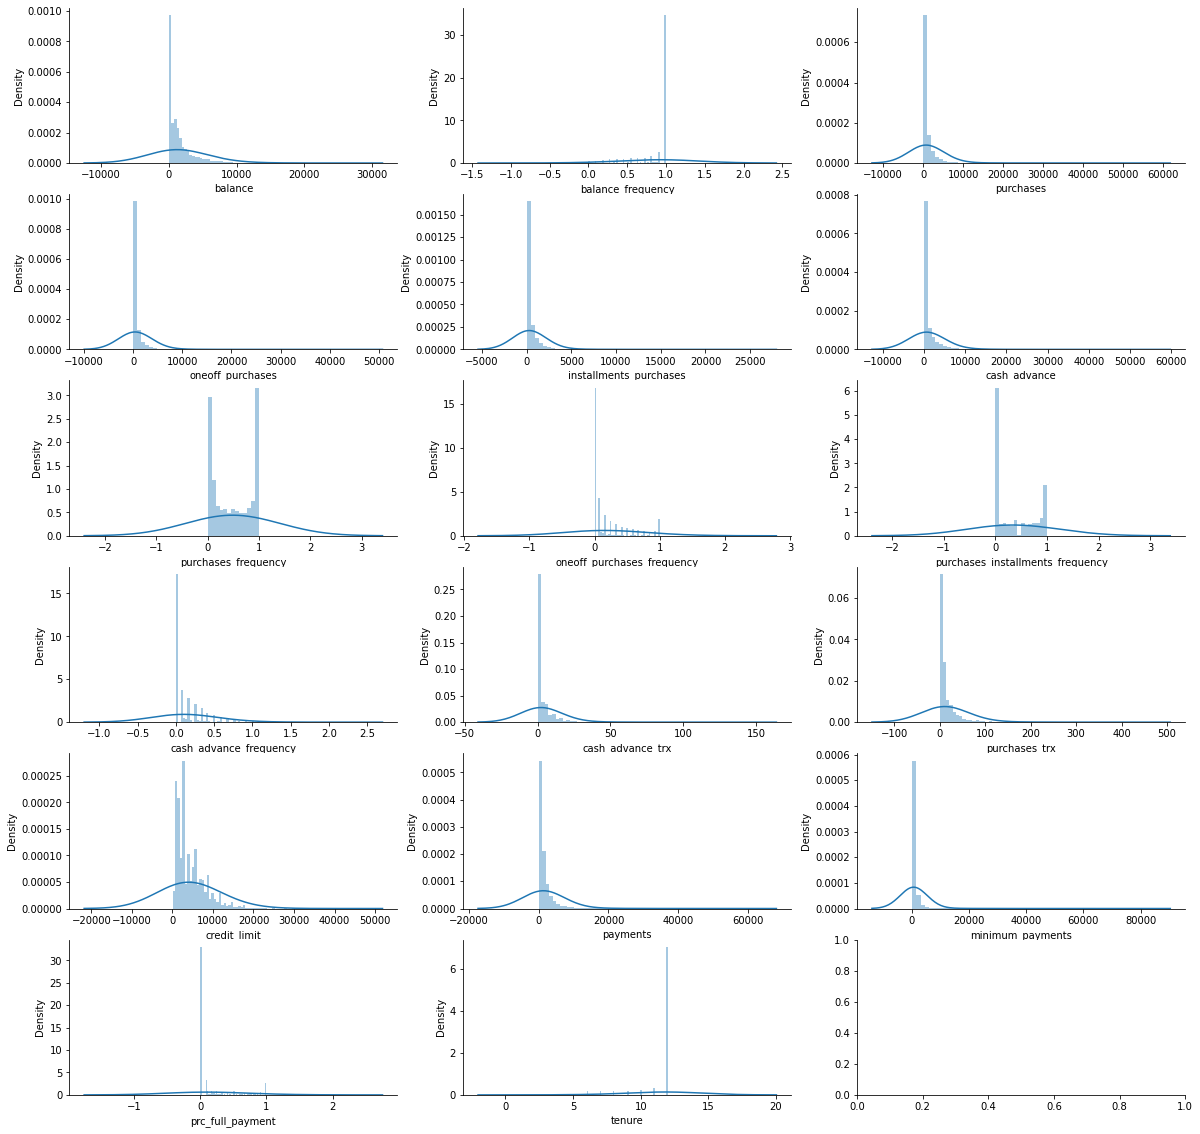

In [26]:
fig, axs = plt.subplots(6,3, figsize=(20, 20))
for i in range(17):
        p = sns.distplot(cc[cc.columns[i]], ax=axs[i//3,i%3],kde_kws = {'bw':2})
        p = sns.despine()
plt.show()

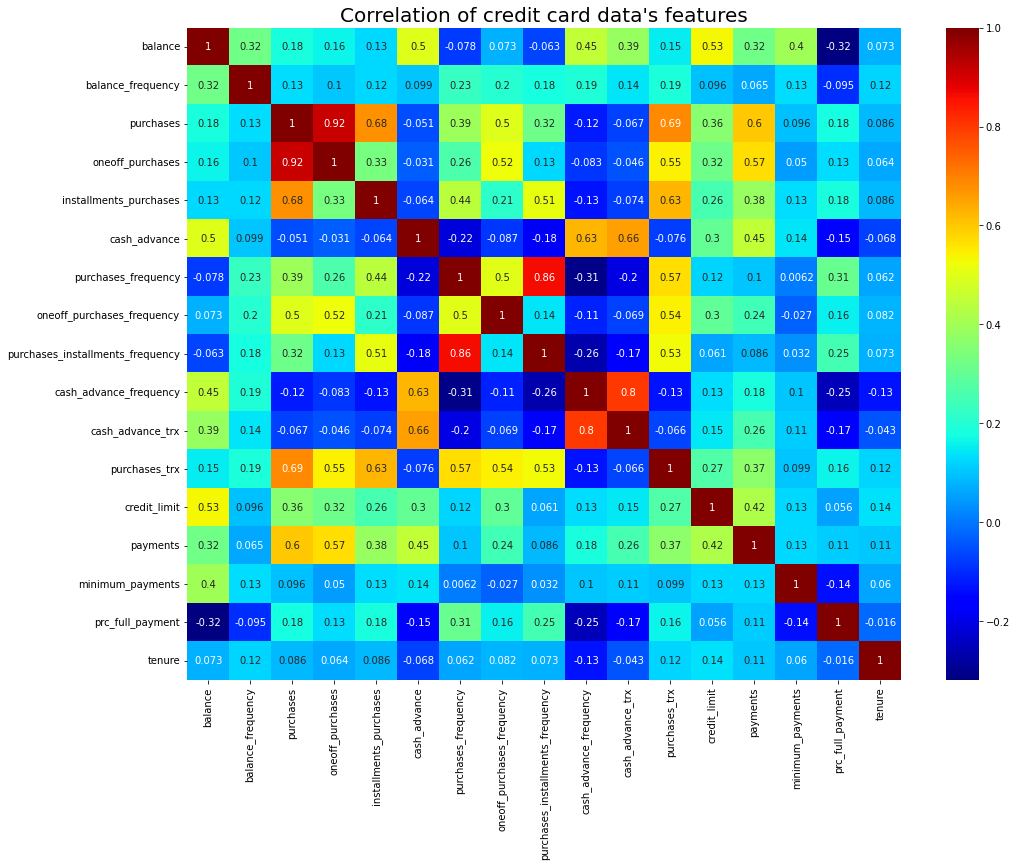

In [27]:
plt.figure(figsize=(16,12))
p = sns.heatmap(cc.corr(),annot=True,cmap='jet').set_title("Correlation of credit card data\'s features",fontsize=20)
plt.show()

In [30]:
model_5 = GMM(5,random_state=0).fit(X) 
clusters = model_5.fit_predict(X)

print('<b>The model has converged :</b>'+str(model_5.converged_))
print('<b>The model has taken iterations :</b>'+str(model_5.n_iter_))


<b>The model has converged :</b>True
<b>The model has taken iterations :</b>57


<b>The model has converged :</b>True
<b>The model has taken iterations :</b>51


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster sizes')

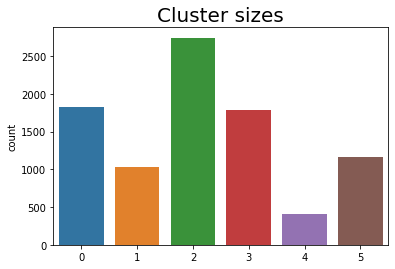

In [35]:
model_6 = GMM(6,random_state=0).fit(X) 
clusters = model_6.fit_predict(X)

print('<b>The model has converged :</b>'+str(model_6.converged_))
print('<b>The model has taken iterations :</b>'+str(model_6.n_iter_))
sns.countplot(clusters).set_title('Cluster sizes',fontsize=20)


<b>The model has converged :</b>True
<b>The model has taken iterations :</b>60


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster sizes')

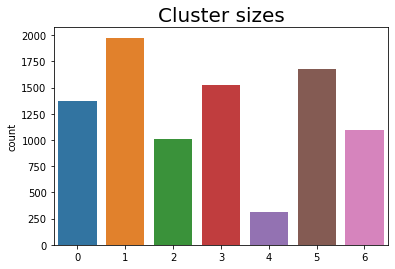

In [55]:
model_7 = GMM(7,random_state=0).fit(X) 
clusters = model_7.fit_predict(X)

print('<b>The model has converged :</b>'+str(model_7.converged_))
print('<b>The model has taken iterations :</b>'+str(model_7.n_iter_))
sns.countplot(clusters).set_title('Cluster sizes',fontsize=20)

In [57]:
score_gmm_s = silhouette_score(X, clusters, metric='euclidean')
print('Silhouette Score: %.4f' % score_gmm_s)

Silhouette Score: 0.0480


In [39]:
cc1 = cc.copy()
cc1['cluster']=clusters

for i in range(7):
    print('Cluster'+str(i))
    print(cc1[cc1.cluster == i].describe())

Cluster0
            balance  balance_frequency     purchases  oneoff_purchases  \
count   1367.000000        1367.000000   1367.000000       1367.000000   
mean     292.437680           0.779876   2081.845713       1384.526284   
std      581.747641           0.280053   3621.378207       2842.180713   
min        0.000000           0.000000      0.010000          0.000000   
25%       48.185721           0.545455    436.975000        168.975000   
50%      140.741786           0.909091   1070.730000        620.000000   
75%      332.335637           1.000000   2406.370000       1485.480000   
max    11547.520010           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             1367.000000   1367.000000          1367.000000   
mean               697.319429      0.408315             0.658986   
std               1438.529479     15.096623             0.350509   
min                  0.000000      0.000000         

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


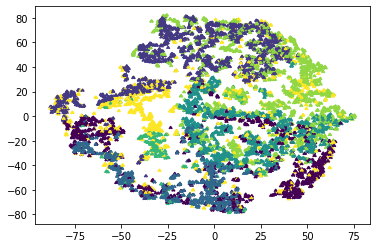

In [40]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X.copy())

plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker=10,
            s=10,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=clusters   # Colour as per gmm
            )

# **Clustering using DBScan**

In [45]:
from sklearn import cluster, datasets, mixture


db = cluster.DBSCAN(eps=0.3, min_samples=10).fit(X)
db_clusters = db.fit_predict(X)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)




Estimated number of clusters: 6
Estimated number of noise points: 3396


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Silhouette Score: -0.1659


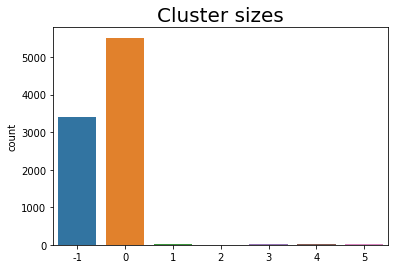

In [58]:

sns.countplot(db_clusters).set_title('Cluster sizes',fontsize=20)



In [59]:
score_db_s = silhouette_score(X, db_clusters, metric='euclidean')
print('Silhouette Score: %.4f' % score_db_s)

Silhouette Score: -0.1659


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


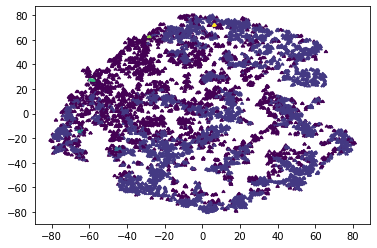

In [46]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X.copy())

plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker=10,
            s=10,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=db_clusters   # Colour as per gmm
            )

#K Means Clustering result

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=7,random_state= 10)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(X, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(X, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.2381
Calinski Harabasz Score: 1844.2641
Davies Bouldin Score: 1.3528


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cluster sizes')

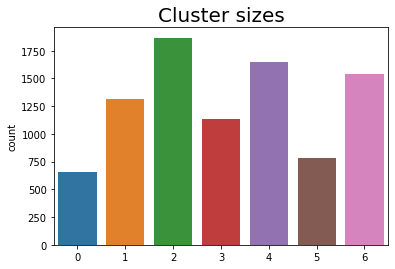

In [51]:
sns.countplot(predictions).set_title('Cluster sizes',fontsize=20)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


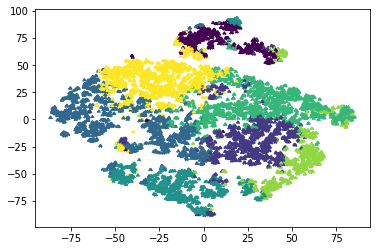

In [52]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X.copy())

plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker=10,
            s=10,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=predictions   # Colour as per gmm
            )